<a href="https://colab.research.google.com/github/SandipanMukhopadhyay/gold_price_prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
#Loading the csv data to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print first five rows in the dataframe
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.Possitive Correlation

2.Negative Correlation

In [10]:
correlation = gold_data.corr()

<ipython-input-10-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

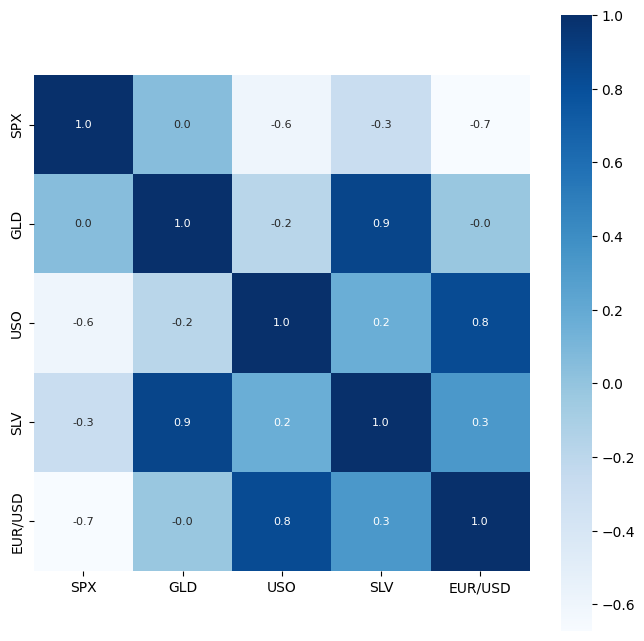

In [12]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-8ec67587274e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

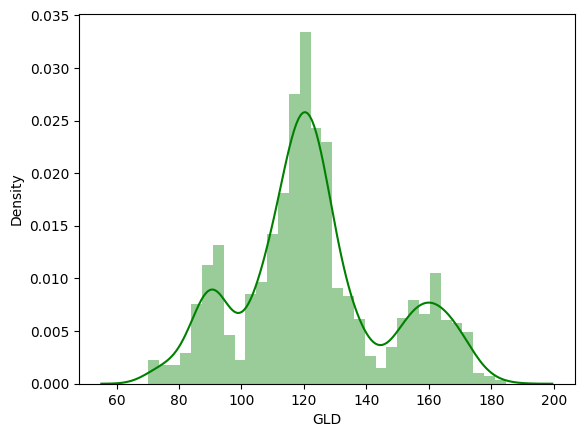

In [17]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the feature and Target

In [22]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test data

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

Model Training : Random Forest Regressor

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [29]:
# prediction of test data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.57959945  81.85709998 116.18850029 127.73420094 120.72150158
 154.85399764 150.20849879 126.11300057 117.48829879 126.02530065
 116.6677012  171.34940107 141.76069826 167.9646986  115.24870036
 117.48170058 138.5199028  170.07690098 160.14400318 157.30400024
 155.17050013 125.35130031 175.72459893 157.2645029  125.18630054
  93.85059941  77.78160002 120.33640005 119.05599942 167.63249868
  88.27360004 125.39980024  90.93840047 117.71410018 121.15729946
 136.44760091 115.58610125 115.40390065 145.11329956 107.40400086
 104.21220248  87.13549779 126.4704005  117.94179976 151.95889876
 119.65570041 108.23389997 108.37939801  93.23060089 127.25789755
  75.22090027 113.68529954 121.37610003 111.28409948 118.90399878
 120.86039936 159.32619946 168.13500124 147.20629679  85.67689838
  94.48980044  86.8068992   90.42059982 119.05240057 126.41210064
 127.5487     169.67710043 122.38029938 117.21629887  98.38910012
 167.54500185 142.93089774 131.83160247 121.15390219 120.88899936
 119.85950

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score )

R squared error:  0.989817888711544


Compare the actual and predicted values in a plot

In [33]:
Y_test = list(Y_test)

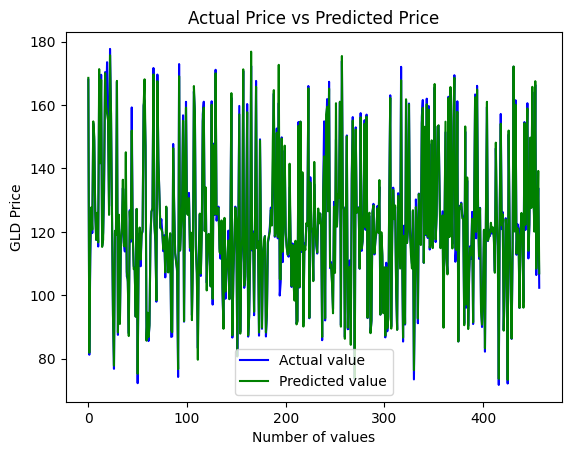

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(test_data_prediction,color = 'green',label ='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()